In [313]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [314]:
def loadDataset():
    trainDataset = h5py.File("train_catvnoncat.h5", "r")
    trainDatasetX = np.array(trainDataset["train_set_x"][:])
    trainDatasetY = np.array(trainDataset["train_set_y"][:])
    
    testDataset = h5py.File("test_catvnoncat.h5")
    testDatasetX = np.array(testDataset["test_set_x"][:])
    testDatasetY = np.array(testDataset["test_set_y"][:])

    classes = np.array(trainDataset["list_classes"][:])

    trainDatasetY = trainDatasetY.reshape((1, trainDatasetY.shape[0]))
    testDatasetY = testDatasetY.reshape((1, testDatasetY.shape[0]))
    return trainDatasetX, trainDatasetY, testDatasetX, testDatasetY, classes

trainDatasetX, trainDatasetY, testDatasetX, testDatasetY, classes = loadDataset()
print(trainDatasetX.shape, trainDatasetY.shape)

(209, 64, 64, 3) (1, 209)


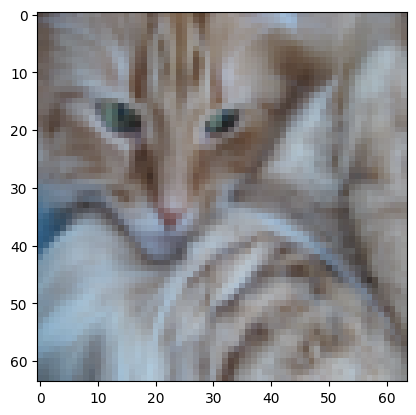

y = 1, it's a 'cat' picture.


In [315]:
index = 2
plt.imshow(trainDatasetX[index])
plt.show()
print ("y = " + str(trainDatasetY[0, index]) + ", it's a '" + classes[np.squeeze(trainDatasetY[:, index])].decode("utf-8") +  "' picture.")

In [316]:
m_train = trainDatasetX.shape[0]
m_test = testDatasetX.shape[0]
num_px = trainDatasetX.shape[1]

print("Number of training examples: ", m_train)
print("Number of testing examples: ", m_test)
print("Height of image: ", num_px, "px")
print("Shape of image: ", trainDatasetX[0].shape)
print("Shape of training dataset X: ", trainDatasetX.shape)
print("Shape of training dataset Y: ", trainDatasetY.shape)

Number of training examples:  209
Number of testing examples:  50
Height of image:  64 px
Shape of image:  (64, 64, 3)
Shape of training dataset X:  (209, 64, 64, 3)
Shape of training dataset Y:  (1, 209)


In [317]:
XTrainFlatten = trainDatasetX.reshape(trainDatasetX.shape[0],-1).T
XTestFlatten = testDatasetX.reshape(testDatasetX.shape[0],-1).T
print("Shape of XFlatten: ", XTrainFlatten.shape)
print("Shape of XTestFlatten: ", XTestFlatten.shape)

Shape of XFlatten:  (12288, 209)
Shape of XTestFlatten:  (12288, 50)


In [318]:
XTrainFlatten = XTrainFlatten / 255
XTestFlatten = XTestFlatten / 255

In [319]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [320]:
def initializeParameters(dim):
    w = np.zeros((dim,1))
    b = np.zeros((1,1))
    return w, b

In [321]:
def propagate(w, b, X, Y):
    m = X.shape[0]

    #forward prop
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)

    #cost calculation
    logprobs = np.multiply(np.log(A + 1e-8),Y) + np.multiply(np.log(1-A + 1e-8),1-Y)
    cost = -1*np.sum(logprobs)/m

    #backward prop
    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m
    grad = {"dw": dw,
            "db": db}
    
    return grad, cost

In [322]:
def train_model(X, Y, numIterations, learningRate, printCost = False):
    nx = X.shape[0]
    m = X.shape[1]
    w, b = initializeParameters(nx)
    costs = []

    for i in range(numIterations):
        #forward propagation, cost calculation and backward propagation
        grad, cost = propagate(w, b, X, Y)
        costs.append(cost)
        #update weights
        w = w - learningRate*grad["dw"]
        b = b - learningRate*grad["db"]

        if(printCost and i%100==0):
            print(f"Cost after {i} iterations: {cost}")
    
    params = {"w": w,
              "b": b}
    
    return params, costs

In [323]:
params, costs = train_model(XTrainFlatten, trainDatasetY, numIterations = 2000, learningRate = 0.005, printCost = True)

Cost after 0 iterations: 0.011789368209393603
Cost after 100 iterations: 0.010969537826574604
Cost after 200 iterations: 0.0108518097546687
Cost after 300 iterations: 0.010744281426406687
Cost after 400 iterations: 0.010645248290461382
Cost after 500 iterations: 0.010553403978479507
Cost after 600 iterations: 0.010467686298561664
Cost after 700 iterations: 0.010387228771609998
Cost after 800 iterations: 0.010311321612814424
Cost after 900 iterations: 0.010239380553594371
Cost after 1000 iterations: 0.010170922039647944
Cost after 1100 iterations: 0.010105543543823411
Cost after 1200 iterations: 0.01004290794642152
Cost after 1300 iterations: 0.009982731132976421
Cost after 1400 iterations: 0.009924772129942734
Cost after 1500 iterations: 0.009868825240071386
Cost after 1600 iterations: 0.009814713753695132
Cost after 1700 iterations: 0.009762284903351858
Cost after 1800 iterations: 0.009711405801141324
Cost after 1900 iterations: 0.009661960154643844


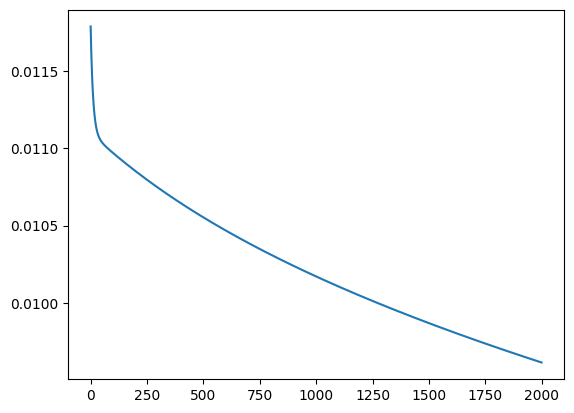

In [324]:
plt.plot(costs)
plt.show()

In [325]:
def predict(params, X, Y):
    w = params["w"]
    b = params["b"]
    Z = w.T.dot(X) + b
    A = sigmoid(Z)
    Y_Prediction = (A > 0.5) * 1.0
    return Y_Prediction

#checking accuracy
trainPrediction = predict(params, XTrainFlatten, trainDatasetY)
testPrediction = predict(params, XTestFlatten, testDatasetY)
print(f"train accuracy: {100-np.mean(np.abs(trainPrediction-trainDatasetY))*100}")
print(f"test accuracy: {100-np.mean(np.abs(testPrediction-testDatasetY))*100}")

train accuracy: 69.377990430622
test accuracy: 38.0
